1. **Acción-valor clásico (promedio):**
    - Promediar la recompensa por acción sin tener en cuenta el estado.
    - Aplicable si tratamos el entorno como un bandit gigante.

* Puede haber **alta varianza**: la acción que parece mejor en promedio puede fallar dependiendo del estado.
* No alcanza políticas óptimas, porque **no considera el contexto (estado)**.
* Ideal como punto de partida para comparar otros enfoques más sofisticados.

$$
Q(a) \leftarrow Q(a) + \frac{1}{N(a)} \cdot (R - Q(a))
$$

Donde:

* `Q(a)`: valor estimado de la acción `a`.
* `N(a)`: número de veces que se ha elegido `a`.
* `R`: recompensa recibida tras ejecutar `a`.


Episodio 0, Recompensa total: -720.21, Q: [-6.18166783 -7.16687567 -5.79778044 -5.8633787 ]
Episodio 50, Recompensa total: -110.86, Q: [-1.78874909 -7.16687567 -7.43412443 -7.12334849]
Episodio 100, Recompensa total: -89.23, Q: [-1.84860887 -7.16687567 -7.43412443 -7.12334849]
Episodio 150, Recompensa total: -163.30, Q: [-1.83695631 -7.16687567 -7.43412443 -7.12334849]
Episodio 200, Recompensa total: -88.78, Q: [-1.84334564 -7.16687567 -7.43412443 -7.12334849]
Episodio 250, Recompensa total: -101.80, Q: [-1.85375649 -7.16687567 -7.43412443 -7.12334849]
Episodio 300, Recompensa total: -142.77, Q: [-1.85854176 -7.16687567 -7.43412443 -7.12334849]
Episodio 350, Recompensa total: -150.99, Q: [-1.86810563 -7.16687567 -7.43412443 -7.12334849]
Episodio 400, Recompensa total: -114.36, Q: [-1.87329857 -7.16687567 -7.43412443 -7.12334849]
Episodio 450, Recompensa total: -156.30, Q: [-1.88148965 -7.16687567 -7.43412443 -7.12334849]
Episodio 500, Recompensa total: -172.53, Q: [-1.90132633 -7.16687

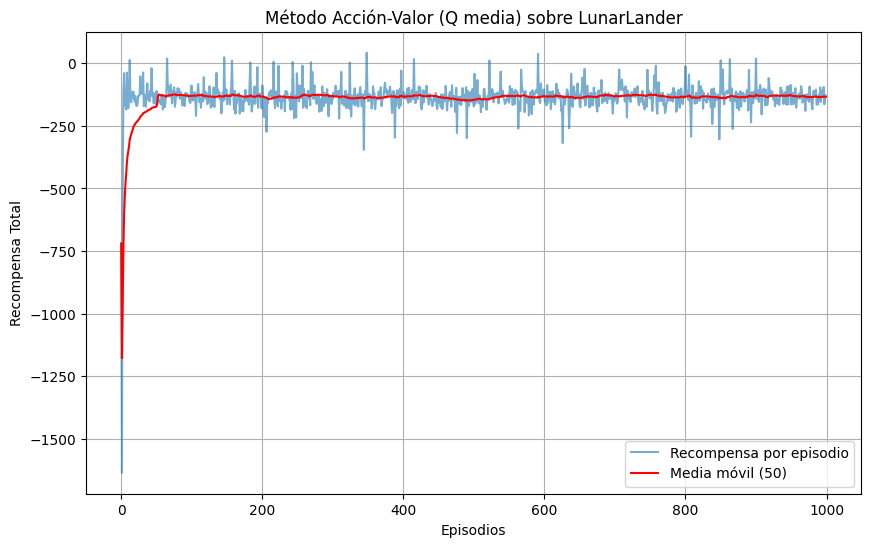

In [7]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Configuración
EPISODES = 1000
ACTIONS = 4  # Acciones posibles en LunarLander-v3

# Inicializar entorno
env = gym.make("LunarLander-v3")

# Inicializar Q como media de recompensas por acción (sin considerar el estado)
Q = np.zeros(ACTIONS)
N = np.zeros(ACTIONS)  # Veces que se ha elegido cada acción
rewards_history = []

for episode in range(EPISODES):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Selección de acción: Greedy puro (acción con mayor recompensa media estimada)
        action = np.argmax(Q)

        # Ejecutar acción
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Actualizar total de recompensa del episodio
        total_reward += reward

        # Actualizar valores Q tipo bandit (media)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]  # promedio incremental

        state = next_state

    rewards_history.append(total_reward)

    if episode % 50 == 0:
        print(f"Episodio {episode}, Recompensa total: {total_reward:.2f}, Q: {Q}")

# Cierre del entorno
env.close()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(rewards_history, label="Recompensa por episodio", alpha=0.6)
plt.plot([np.mean(rewards_history[max(0, i-50):i+1]) for i in range(len(rewards_history))],
         label="Media móvil (50)", color="red")
plt.xlabel("Episodios")
plt.ylabel("Recompensa Total")
plt.title("Método Acción-Valor (Q media) sobre LunarLander")
plt.legend()
plt.grid(True)
plt.show()

2. **Incremental:**
    - Igual al anterior, pero con actualización incremental `Q[a] ← Q[a] + α(R - Q[a])`.

$$
Q(a) \leftarrow Q(a) + \alpha (R - Q(a))
$$

Donde:

* `Q(a)`: estimación actual del valor de la acción `a`.
* `R`: recompensa recibida tras ejecutar `a`.
* `α`: tasa de aprendizaje fija (por ejemplo, 0.1).
* `(R - Q(a))`: es el **error temporal** o delta: cuánto difiere la recompensa observada del valor estimado.

Esta fórmula se deriva del mismo principio de aprendizaje por refuerzo (temporal difference learning), pero es más flexible que el método de promedio clásico (`1/N`), porque:

* No necesita llevar un contador `N`.
* Puede responder a cambios más recientes en el entorno.
* Es ideal cuando el entorno es ruidoso o cambiante.

Episodio 0, Recompensa total: -373.33, Q: [-15.8205036   -6.50035463  -7.01679583  -6.73889523]
Episodio 50, Recompensa total: -102.30, Q: [ -4.17442403 -19.74188379 -16.01724984 -19.12814726]
Episodio 100, Recompensa total: -147.59, Q: [ -9.87593801 -19.74188379 -16.01724984 -19.12814726]
Episodio 150, Recompensa total: -177.16, Q: [-10.98419228 -19.74188379 -16.01724984 -19.12814726]
Episodio 200, Recompensa total: -153.05, Q: [-10.69720384 -26.43593306 -20.50230865 -22.23674904]
Episodio 250, Recompensa total: -204.88, Q: [-10.89928932 -26.43593306 -20.50230865 -22.23674904]
Episodio 300, Recompensa total: -113.23, Q: [ -7.67273074 -26.43593306 -20.50230865 -22.23674904]
Episodio 350, Recompensa total: -140.10, Q: [ -9.84685785 -26.43593306 -20.50230865 -22.23674904]
Episodio 400, Recompensa total: -138.92, Q: [ -9.58478953 -26.43593306 -20.50230865 -22.23674904]
Episodio 450, Recompensa total: -120.35, Q: [ -8.82317986 -26.43593306 -20.50230865 -22.23674904]
Episodio 500, Recompens

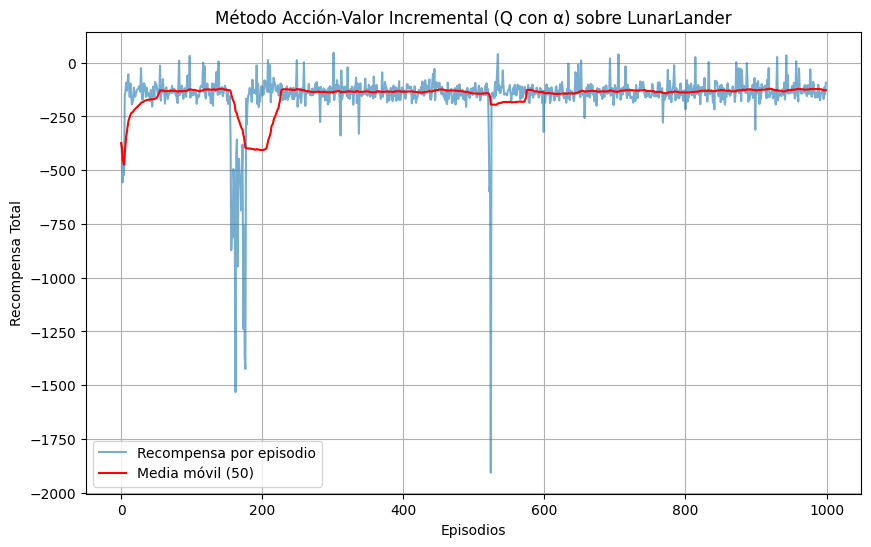

In [8]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Configuración
EPISODES = 1000
ACTIONS = 4  # Acciones posibles en LunarLander-v3
ALPHA = 0.1  # Tasa de aprendizaje fija

# Inicializar entorno
env = gym.make("LunarLander-v3")

# Inicializar Q con ceros (sin considerar estado)
Q = np.zeros(ACTIONS)
rewards_history = []

for episode in range(EPISODES):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Selección de acción greedy
        action = np.argmax(Q)

        # Ejecutar acción
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Actualizar Q con método incremental (con alpha)
        Q[action] += ALPHA * (reward - Q[action])

        state = next_state
        total_reward += reward

    rewards_history.append(total_reward)

    if episode % 50 == 0:
        print(f"Episodio {episode}, Recompensa total: {total_reward:.2f}, Q: {Q}")

# Cierre del entorno
env.close()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(rewards_history, label="Recompensa por episodio", alpha=0.6)
plt.plot([np.mean(rewards_history[max(0, i-50):i+1]) for i in range(len(rewards_history))],
         label="Media móvil (50)", color="red")
plt.xlabel("Episodios")
plt.ylabel("Recompensa Total")
plt.title("Método Acción-Valor Incremental (Q con α) sobre LunarLander")
plt.legend()
plt.grid(True)
plt.show()

3. **Valores iniciales optimistas:**
    - Iniciar los valores Q con un número alto para fomentar exploración temprana.

En el aprendizaje por refuerzo, el agente necesita balancear dos cosas:

* **Explotar** las acciones que ya conoce como buenas.
* **Explorar** otras acciones que aún no ha probado, pero que podrían ser mejores.

Cuando usamos una política greedy pura (siempre elige la acción con mayor Q), el agente tiende a **atascarse** en la primera acción que parezca buena si no ha explorado suficientemente.

La técnica de **valores iniciales optimistas** propone una solución elegante:

$$
Q(a) \gets \text{un valor alto (por ejemplo, 100)}
$$

Así, como todas las acciones parecen muy buenas al inicio, el agente se ve obligado a **probarlas todas**, porque al ir recibiendo recompensas reales más bajas, los valores Q se ajustan hacia abajo.

Episodio 0, Recompensa total: -207.21, Q: [ -3.22504806 -12.11392133  -3.57510231  -3.12450593]
Episodio 50, Recompensa total: -36.52, Q: [ -1.10575698 -17.81292921 -16.24276969 -16.63307973]
Episodio 100, Recompensa total: -170.40, Q: [-10.64303472 -17.81292921 -16.24276969 -16.63307973]
Episodio 150, Recompensa total: -134.76, Q: [ -9.52896484 -20.80309565 -19.06942699 -19.66472937]
Episodio 200, Recompensa total: -157.08, Q: [-10.32123378 -20.80309565 -19.06942699 -19.66472937]
Episodio 250, Recompensa total: -124.51, Q: [-10.43993138 -20.80309565 -19.06942699 -19.66472937]
Episodio 300, Recompensa total: -135.89, Q: [ -9.76504359 -20.80309565 -19.06942699 -19.66472937]
Episodio 350, Recompensa total: -108.05, Q: [ -7.85512164 -20.80309565 -19.06942699 -19.66472937]
Episodio 400, Recompensa total: -162.38, Q: [-10.3434022  -20.80309565 -19.06942699 -19.66472937]
Episodio 450, Recompensa total: -140.46, Q: [ -9.58344438 -20.80309565 -20.25289403 -21.13460779]
Episodio 500, Recompensa

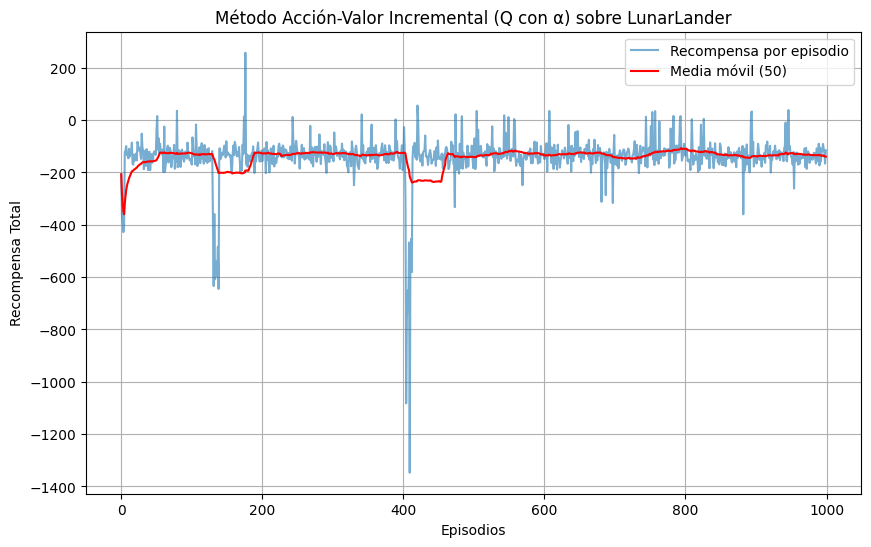

In [9]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Configuración
EPISODES = 1000
ACTIONS = 4  # Acciones posibles en LunarLander-v3
ALPHA = 0.1  # Tasa de aprendizaje fija

# Inicializar entorno
env = gym.make("LunarLander-v3")

# Inicializar Q con ceros (sin considerar estado)
Q = np.zeros(ACTIONS)
rewards_history = []

for episode in range(EPISODES):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Selección de acción greedy
        action = np.argmax(Q)

        # Ejecutar acción
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Actualizar Q con método incremental (con alpha)
        Q[action] += ALPHA * (reward - Q[action])

        state = next_state
        total_reward += reward

    rewards_history.append(total_reward)

    if episode % 50 == 0:
        print(f"Episodio {episode}, Recompensa total: {total_reward:.2f}, Q: {Q}")

# Cierre del entorno
env.close()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(rewards_history, label="Recompensa por episodio", alpha=0.6)
plt.plot([np.mean(rewards_history[max(0, i-50):i+1]) for i in range(len(rewards_history))],
         label="Media móvil (50)", color="red")
plt.xlabel("Episodios")
plt.ylabel("Recompensa Total")
plt.title("Método Acción-Valor Incremental (Q con α) sobre LunarLander")
plt.legend()
plt.grid(True)
plt.show()


4. **UCB:**
    - Agregar el término de incertidumbre `+ c * sqrt(log(t) / N[a])`.

La idea es que cada acción `a` se evalúa no solo por su valor esperado Q, sino por una cota superior que incluye una medida de **incertidumbre**:

$$
\text{UCB}(a) = Q(a) + c \cdot \sqrt{\frac{\log t}{N(a)}}
$$

Donde:

* `Q(a)`: recompensa estimada de la acción `a`.
* `N(a)`: número de veces que se ha elegido la acción `a`.
* `t`: número total de pasos o decisiones tomadas.
* `c`: parámetro de exploración (mayores valores → más exploración).

### Intuición:

* Si una acción ha sido explorada poco (N pequeño), el segundo término es grande → el agente la elige.
* Si una acción ya ha sido muy explorada, el segundo término desaparece y se actúa en base a su valor estimado Q.

Episodio 0, Recompensa total: -240.85, Q: [-2.79326876 -8.70814231 -2.56046206 -2.60744206], N: [19. 47. 45. 41.]
Episodio 50, Recompensa total: -122.93, Q: [ -7.93453404 -17.83732808 -17.25411348 -17.85070442], N: [3226.   48.  486.  171.]
Episodio 100, Recompensa total: -124.23, Q: [ -7.90214668 -25.10492379 -21.152323   -21.16869698], N: [6489.  125.  754.  249.]
Episodio 150, Recompensa total: -114.57, Q: [ -9.28727504 -25.10492379 -21.152323   -21.16869698], N: [10029.   125.   754.   249.]
Episodio 200, Recompensa total: -46.51, Q: [ -3.44490799 -25.10492379 -21.152323   -21.16869698], N: [13450.   125.   754.   249.]
Episodio 250, Recompensa total: -160.16, Q: [ -9.45428997 -25.10492379 -21.152323   -21.16869698], N: [16927.   125.   754.   249.]
Episodio 300, Recompensa total: -139.55, Q: [ -9.33157575 -25.10492379 -21.152323   -21.16869698], N: [20449.   125.   754.   249.]
Episodio 350, Recompensa total: 11.71, Q: [ -4.72212992 -25.10492379 -21.152323   -21.16869698], N: [241

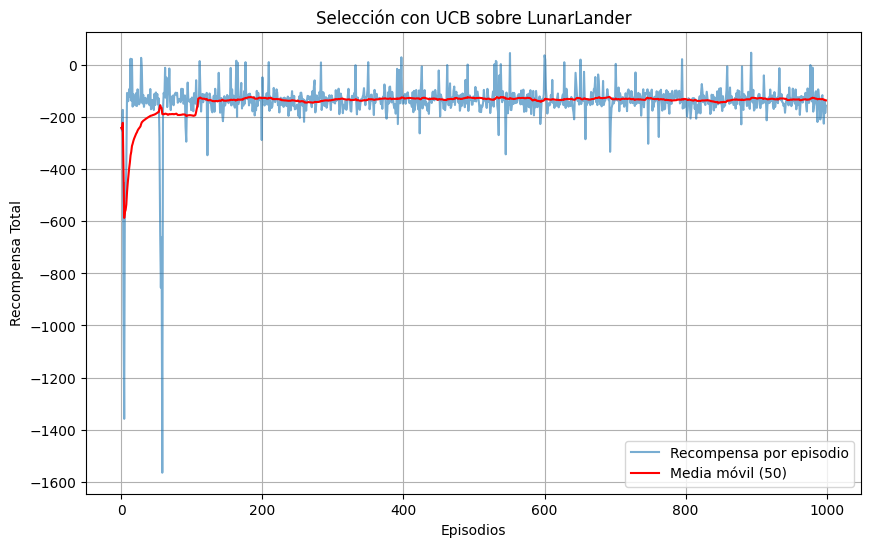

In [10]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Configuración
EPISODES = 1000
ACTIONS = 4  # Acciones posibles en LunarLander-v3
ALPHA = 0.1  # Tasa de aprendizaje
C = 2.0       # Parámetro de exploración para UCB

# Inicializar entorno
env = gym.make("LunarLander-v3")

# Inicializar Q y contador de acciones
Q = np.zeros(ACTIONS)
N = np.zeros(ACTIONS)
rewards_history = []

for episode in range(EPISODES):
    state, _ = env.reset()
    done = False
    total_reward = 0
    t = 0  # contador de pasos (para log(t))

    while not done:
        t += 1
        ucb_values = Q + C * np.sqrt(np.log(t + 1) / (N + 1e-5))
        action = np.argmax(ucb_values)

        # Ejecutar acción
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Actualización de Q y contador N
        Q[action] += ALPHA * (reward - Q[action])
        N[action] += 1

        state = next_state
        total_reward += reward

    rewards_history.append(total_reward)

    if episode % 50 == 0:
        print(f"Episodio {episode}, Recompensa total: {total_reward:.2f}, Q: {Q}, N: {N}")

# Cierre del entorno
env.close()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(rewards_history, label="Recompensa por episodio", alpha=0.6)
plt.plot([np.mean(rewards_history[max(0, i-50):i+1]) for i in range(len(rewards_history))],
         label="Media móvil (50)", color="red")
plt.xlabel("Episodios")
plt.ylabel("Recompensa Total")
plt.title("Selección con UCB sobre LunarLander")
plt.legend()
plt.grid(True)
plt.show()

5. **Gradient Bandits:**
    - Usar una política parametrizada basada en preferencias `H[a]`, actualizadas por gradiente.

Cada acción tiene una **preferencia** $H(a)$. Estas preferencias son parámetros libres que se ajustan con gradiente para mejorar el desempeño del agente.

Las probabilidades de seleccionar acciones se obtienen mediante **softmax**:

$$
\pi(a) = \frac{e^{H(a)}}{\sum_{b} e^{H(b)}}
$$

Estas probabilidades definen la política del agente.

Luego, tras recibir una recompensa $r$, se actualizan las preferencias con la siguiente regla:

$$
H(a) \gets H(a) + \alpha \cdot (r - \bar{r}) \cdot (1 - \pi(a)) \quad \text{si a fue la acción elegida}
$$

$$
H(b) \gets H(b) - \alpha \cdot (r - \bar{r}) \cdot \pi(b) \quad \text{para las demás acciones}
$$

Donde:

* $\bar{r}$ es un **baseline adaptativo** (promedio de recompensas) que se usa para reducir la varianza del gradiente.
* $\alpha$ es la tasa de aprendizaje.

Episodio 0, Recompensa total: -563.13, Política: [0.18119385 0.64761188 0.0621098  0.10908448]
Episodio 50, Recompensa total: -1488.45, Política: [8.91464423e-03 3.07403828e-04 9.90734017e-01 4.39351969e-05]
Episodio 100, Recompensa total: -87.13, Política: [9.99967306e-01 1.36157178e-05 1.71382560e-05 1.94023993e-06]
Episodio 150, Recompensa total: -111.51, Política: [9.99967305e-01 1.36160219e-05 1.71386655e-05 1.94027240e-06]
Episodio 200, Recompensa total: -170.38, Política: [9.99967302e-01 1.36174077e-05 1.71405403e-05 1.94042014e-06]
Episodio 250, Recompensa total: -120.95, Política: [9.99967306e-01 1.36155170e-05 1.71379771e-05 1.94021870e-06]
Episodio 300, Recompensa total: -137.65, Política: [9.99967304e-01 1.36164752e-05 1.71392725e-05 1.94032088e-06]
Episodio 350, Recompensa total: -160.50, Política: [9.99967302e-01 1.36173621e-05 1.71404715e-05 1.94041547e-06]
Episodio 400, Recompensa total: -140.86, Política: [9.99967304e-01 1.36163297e-05 1.71390707e-05 1.94030550e-06]
Ep

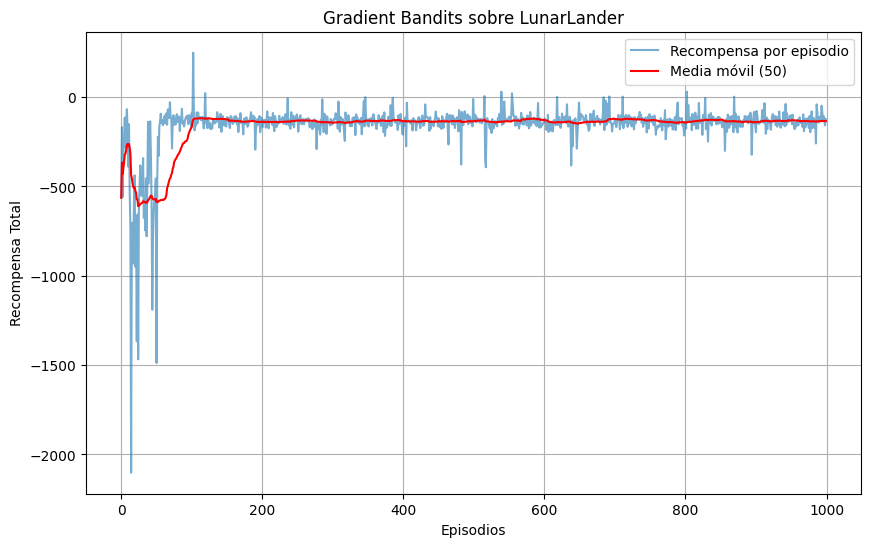

In [11]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Configuración
EPISODES = 1000
ACTIONS = 4  # Acciones posibles
ALPHA = 0.1  # Tasa de aprendizaje para preferencias
BETA = 0.1   # Tasa de aprendizaje para baseline

# Inicializar entorno
env = gym.make("LunarLander-v3")

# Inicializar preferencias (H), política (π) y baseline promedio
H = np.zeros(ACTIONS)
pi = np.ones(ACTIONS) / ACTIONS
baseline = 0.0
rewards_history = []

for episode in range(EPISODES):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Softmax sobre preferencias H
        exp_H = np.exp(H - np.max(H))  # estabilidad numérica
        pi = exp_H / np.sum(exp_H)

        # Selección de acción basada en política
        action = np.random.choice(np.arange(ACTIONS), p=pi)

        # Ejecutar acción
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Actualizar baseline (promedio móvil)
        baseline += BETA * (reward - baseline)

        # Actualizar preferencias
        for a in range(ACTIONS):
            if a == action:
                H[a] += ALPHA * (reward - baseline) * (1 - pi[a])
            else:
                H[a] -= ALPHA * (reward - baseline) * pi[a]

        state = next_state
        total_reward += reward

    rewards_history.append(total_reward)

    if episode % 50 == 0:
        print(f"Episodio {episode}, Recompensa total: {total_reward:.2f}, Política: {pi}")

# Cierre del entorno
env.close()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(rewards_history, label="Recompensa por episodio", alpha=0.6)
plt.plot([np.mean(rewards_history[max(0, i-50):i+1]) for i in range(len(rewards_history))],
         label="Media móvil (50)", color="red")
plt.xlabel("Episodios")
plt.ylabel("Recompensa Total")
plt.title("Gradient Bandits sobre LunarLander")
plt.legend()
plt.grid(True)
plt.show()

6. **Búsqueda asociativa:**
    - Igual que gradient bandits pero con un parámetro de “baseline” para ajustar preferencias.

Este método se inspira en los **gradient bandits**, pero además considera las recompensas esperadas $Q(a)$. La selección de acción depende de:

$$
H(a) = Q(a) + w(a)
$$

Donde:

* $Q(a)$: Valor estimado de la acción (media de recompensas).
* $w(a)$: Peso asociativo (preferencia aprendida).
* $H(a)$: Valor total de preferencia para softmax.

La política se define por:

$$
\pi(a) = \frac{e^{H(a)}}{\sum_b e^{H(b)}}
$$


Episodio 0, Recompensa: -86.21, Q: [-1.08822086 -4.02093232 -3.42170057 -1.86309951], w: [-0.62021103  0.72524932  0.66095722 -0.76599551], Política: [1.13888372e-04 9.99800935e-01 3.97901078e-05 4.53864209e-05]
Episodio 50, Recompensa: -737.45, Q: [-14.33594319 -22.38174232 -26.99945843 -24.58953085], w: [-6.09530853 10.21813128 -7.86049264  3.73766989], Política: [4.61258386e-08 9.99999924e-01 2.49827317e-14 3.02883809e-08]
Episodio 100, Recompensa: -544.23, Q: [-14.33594319 -20.35194097 -26.99945843 -24.58953085], w: [-6.18618037 10.36942983 -7.86049269  3.67724323], Política: [3.79570056e-09 9.99999994e-01 2.25139952e-15 2.56948362e-09]
Episodio 150, Recompensa: -532.30, Q: [-14.33594319 -19.20652014 -26.99945843 -24.58953085], w: [-6.33136864 10.61429141 -7.86049278  3.57757001], Política: [7.19736146e-10 9.99999999e-01 4.93615006e-16 5.09910734e-10]
Episodio 200, Recompensa: -427.31, Q: [-14.33594319 -19.18822237 -26.99945843 -24.58953085], w: [-6.33818546 10.62594187 -7.86049278

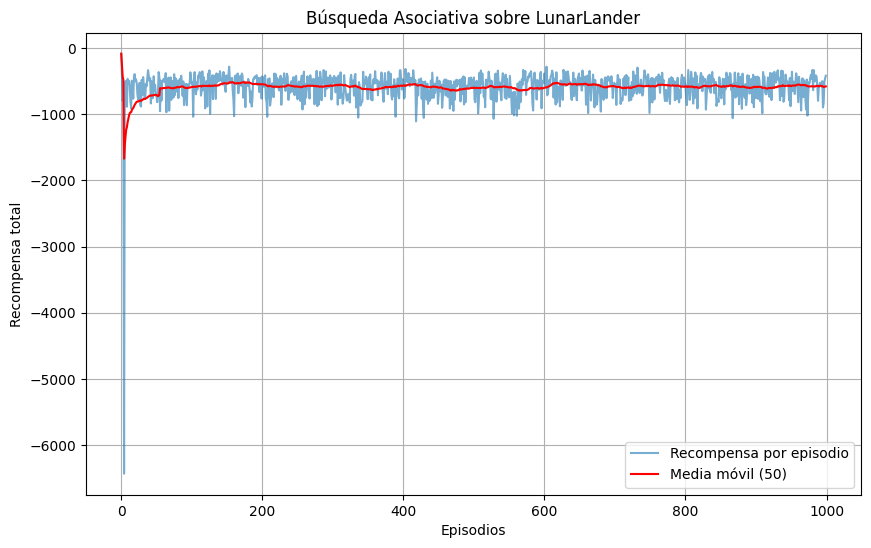

In [12]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Configuración
EPISODES = 1000
ACTIONS = 4
ALPHA = 0.1
BETA = 0.1

# Inicializar entorno y parámetros
env = gym.make("LunarLander-v3")

# Inicializar valores Q, baseline, pesos asociativos y preferencia lineal
Q = np.zeros(ACTIONS)
N = np.zeros(ACTIONS)
H = np.zeros(ACTIONS)
w = np.zeros(ACTIONS)  # pesos asociativos
baseline = 0.0
rewards_history = []

for episode in range(EPISODES):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Cálculo de preferencia lineal
        H = Q + w  # búsqueda asociativa simple

        # Política softmax sobre H
        exp_H = np.exp(H - np.max(H))
        pi = exp_H / np.sum(exp_H)
        
        # Selección de acción
        action = np.random.choice(np.arange(ACTIONS), p=pi)

        # Ejecución de acción
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Actualización de Q con regla incremental
        Q[action] += ALPHA * (reward - Q[action])
        N[action] += 1

        # Actualizar baseline
        baseline += BETA * (reward - baseline)

        # Actualización de los pesos asociativos
        for a in range(ACTIONS):
            if a == action:
                w[a] += ALPHA * (reward - baseline) * (1 - pi[a])
            else:
                w[a] -= ALPHA * (reward - baseline) * pi[a]

        state = next_state
        total_reward += reward

    rewards_history.append(total_reward)

    if episode % 50 == 0:
        print(f"Episodio {episode}, Recompensa: {total_reward:.2f}, Q: {Q}, w: {w}, Política: {pi}")

env.close()

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(rewards_history, alpha=0.6, label="Recompensa por episodio")
plt.plot([np.mean(rewards_history[max(0, i-50):i+1]) for i in range(len(rewards_history))], color='red', label="Media móvil (50)")
plt.xlabel("Episodios")
plt.ylabel("Recompensa total")
plt.title("Búsqueda Asociativa sobre LunarLander")
plt.grid(True)
plt.legend()
plt.show()
